<a href="https://colab.research.google.com/github/antoniopenizollo/logica-fuzzy/blob/main/modelo_lavanderia_antonio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exemplo de aplicação de lógica nebulosa (fuzzy)

* **Entrada (antecedentes):** 

> Grau de sujeira
>> Universo (intervalo de valores nítidos/*crisp*): 0 a 100

>> Conjunto difuso (valores difusos):
>>> T(X1) = {PS, MS, GS} = {pequena sujeira, média sujeira, grande sujeira}

> Quantidade de manchas na roupa
>> Universo (intervalo de valores nítidos/*crisp*): 0 a 100

>> Conjunto difuso (valores difusos): 
>>> T(X2) = {SM, MM, GM} = {sem mancha, média qnt mancha, grande qnt manchas}


* **Saída (consequentes):**

> Tempo de lavagem 

>> Universo (valores nítidos/*crisp*): 0 a 60 min

>> Conjunto difuso (valores difusos):
>>> T(Y) = {MC, C, M, L, ML} = {muito curto, curto, médio, longo, muito longo}

### Regras de Decisão

> R1: se X1 é PS e X2 é SM, então Y é MC

> R2: se X1 é PS e X2 é MM, então Y é M

> R3: se X1 é PS e X2 é GM, então Y é L

> R4: se X1 é MS e X2 é SM, então Y é C

> R5: se X1 é MS e X2 é MM, então Y é M

> R6: se X1 é MS e X2 é GM, então Y é L

> R7: se X1 é GS e X2 é SM, então Y é M

> R8: se X1 é GS e X2 é MM, então Y é L

> R9: se X1 é GS e X2 é GM, então Y é ML




In [1]:
# Se necessário, instale o pacote skfuzzy
!pip install networkx==2.3
!pip install scikit-fuzzy


     |████████████████████████████████| 1.7 MB 12.6 MB/s 
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556009 sha256=22c4196fd75c8efb0b0705f6899f221841adfe832653f91bda86b98eada347ed
  Stored in directory: /root/.cache/pip/wheels/44/e6/b8/4efaab31158e9e9ca9ed80b11f6b11130bac9a9672b3cbbeaf
Successfully built networkx
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.3
    Uninstalling networkx-2.6.3:
      Successfully uninstalled networkx-2.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 993 kB 14.7 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=ac2fa69f35d8aa3fdcda60607d4476c9441f571f03221f8c26670904

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Cria as variáveis do problema
sujeira = ctrl.Antecedent(np.arange(0, 101, 1), 'sujeira')
mancha = ctrl.Antecedent(np.arange(0, 101, 1), 'mancha')

 #Controls which defuzzification method will be used.
 #       * 'centroid': Centroid of area
 #       * 'bisector': bisector of area
 #       * 'mom'     : mean of maximum
 #       * 'som'     : min of maximum
 #       * 'lom'     : max of maximum

tempo = ctrl.Consequent(np.arange(0, 61, 1), 'tempo', 'mom')
print(tempo.defuzzify_method)


# Cria automaticamente o mapeamento entre valores nítidos e difusos 
# usando uma função de pertinência padrão (triângulo)
sujeira.automf(names=['pequena', 'média', 'grande'])
mancha.automf(names=['sem mancha', 'média', 'grande'])
tempo.automf(names=['muito curto', 'curto', 'médio', 'longo', 'muito longo'])

mom


### Mostrando graficamente as funções de partinência criadas

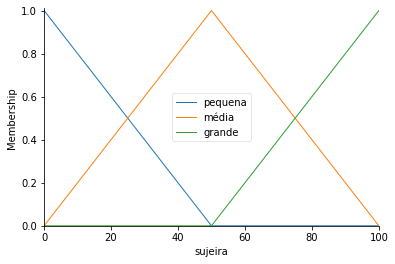

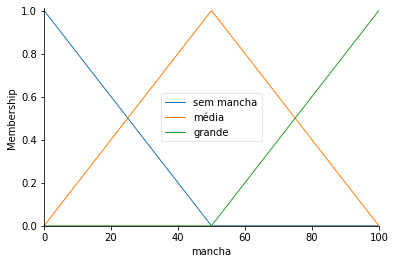

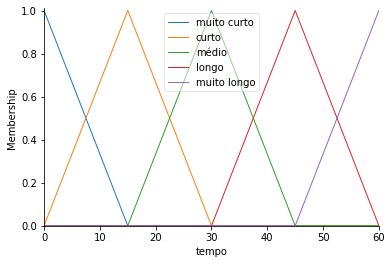

In [3]:
sujeira.view()
mancha.view()
tempo.view()


### Criando as regras de decisão difusas

In [4]:
#sujeira.automf(names=['pequena', 'média', 'grande'])
#mancha.automf(names=['sem mancha', 'média', 'grande'])
#tempo.automf(names=['muito curto', 'curto', 'médio', 'longo', 'muito longo'])


#R1: se X1 é PS e X2 é SM, então Y é MC
rule1 = ctrl.Rule(sujeira['pequena'] & mancha['sem mancha'], tempo['muito curto'])

#R2: se X1 é PS e X2 é MM, então Y é M
rule2 = ctrl.Rule(sujeira['pequena'] & mancha['média'], tempo['médio'])

#R3: se X1 é PS e X2 é GM, então Y é L
rule3 = ctrl.Rule(sujeira['pequena'] & mancha['grande'], tempo['longo'])

#R4: se X1 é MS e X2 é SM, então Y é C
rule4 = ctrl.Rule(sujeira['média'] & mancha['sem mancha'], tempo['curto'])

#R5: se X1 é MS e X2 é MM, então Y é M
rule5 = ctrl.Rule(sujeira['média'] & mancha['média'], tempo['médio'])

#R6: se X1 é MS e X2 é GM, então Y é L
rule6 = ctrl.Rule(sujeira['média'] & mancha['grande'], tempo['longo'])

#R7: se X1 é GS e X2 é SM, então Y é M
rule7 = ctrl.Rule(sujeira['grande'] & mancha['sem mancha'], tempo['médio'])

#R8: se X1 é GS e X2 é MM, então Y é L
rule8 = ctrl.Rule(sujeira['grande'] & mancha['média'], tempo['longo'])

#R9: se X1 é GS e X2 é GM, então Y é ML
rule9 = ctrl.Rule(sujeira['grande'] & mancha['grande'], tempo['muito longo'])

### Criando e simulando um controlador nebuloso

In [5]:
tempo_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
tempo_simulador = ctrl.ControlSystemSimulation(tempo_ctrl)

# Entrando com alguns valores para qualidade da comida e do serviço
tempo_simulador.input['sujeira'] = 50
tempo_simulador.input['mancha'] = 25

# Computando o resultado
tempo_simulador.compute()
print(tempo_simulador.output['tempo'])


22.5


### Mostrando graficamente o resultado

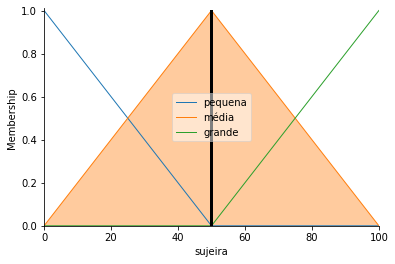

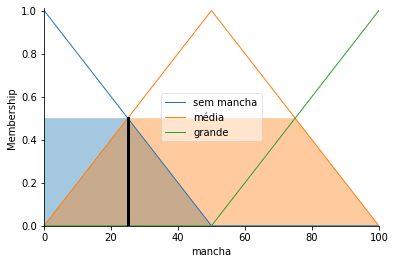

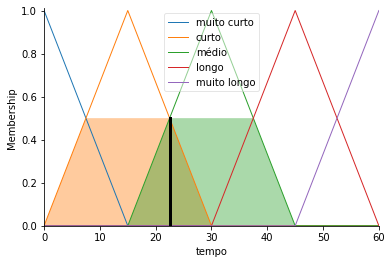

In [6]:
sujeira.view(sim=tempo_simulador)
mancha.view(sim=tempo_simulador)
tempo.view(sim=tempo_simulador)